In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../datasets/allstate/train.csv')
test = pd.read_csv('../datasets/allstate/test.csv')

In [3]:
train.shape, test.shape

((188318, 132), (125546, 131))

In [4]:
train.head(1)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.33506,0.3026,0.67135,0.8351,0.569745,0.594646,0.822493,0.714843,2213.18


In [5]:
y = train['loss'].values
# Y = np.log1p(y)
Y = np.log10(y)

In [6]:
train = train.drop('loss', axis=1)

In [7]:
data = pd.concat([train, test], axis=0)

In [8]:
data.shape

(313864, 131)

In [9]:
num_cols = [col for col in list(data.columns) if 'cont' in col]
cat_cols = [col for col in list(data.columns) if 'cat' in col]

In [224]:
data_cat = pd.DataFrame()

In [225]:
from tqdm import tqdm_notebook
for col in tqdm_notebook(cat_cols):
    df = pd.get_dummies(data[col])
    cols = [col+'_'+str(n) for n in range(data[col].nunique())]
    df.columns = cols
    data_cat = pd.concat([data_cat, df], axis=1)
data_cat = data_cat.reset_index(drop=True)

In [12]:
data_cat.shape

(313864, 1176)

In [13]:
data_cat.head(1)

,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat4_0,cat4_1,cat5_0,cat5_1,...,cat116_339,cat116_340,cat116_341,cat116_342,cat116_343,cat116_344,cat116_345,cat116_346,cat116_347,cat116_348
0,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont1'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28686777325213325

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


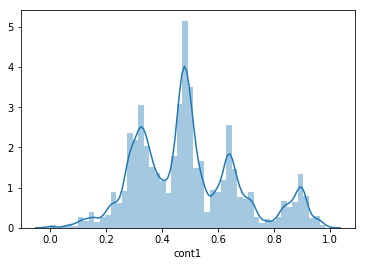

In [15]:
sns.distplot(train['cont1'])

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log1p(train['cont1'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28686777325213325

In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sin(train['cont1'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28686777325213325

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cos(train['cont1'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28686777325213325

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sqrt(train['cont1'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28686777325213325

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.1,30)
X = pd.get_dummies(pd.cut(train['cont1'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2874369585850209

In [21]:
data_num = pd.DataFrame()

In [22]:
data_num['cont1'] = data['cont1'].values

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


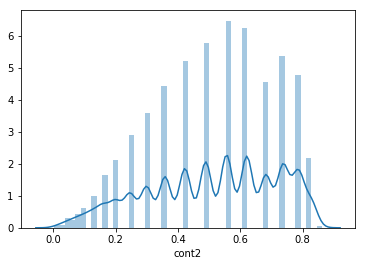

In [23]:
sns.distplot(train['cont2'])

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont2'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28627845107980365

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont2'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28627845107980365

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sin(train['cont2'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28627845107980365

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cos(train['cont2'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28627845107980365

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sqrt(train['cont2'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28627845107980365

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.0,40)
X = pd.get_dummies(pd.cut(train['cont2'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28613980856884963

In [30]:
bins = np.linspace(-0.1,1.0,40)
X = pd.get_dummies(pd.cut(data['cont2'].values, bins))
cont2_bins = pd.DataFrame(X)

In [31]:
cols = ['cont2_'+str(n) for n in range(X.shape[1])]

In [32]:
cont2_bins.columns = cols
cont2_bins.head(1)

,cont2_0,cont2_1,cont2_2,cont2_3,cont2_4,cont2_5,cont2_6,cont2_7,cont2_8,cont2_9,...,cont2_29,cont2_30,cont2_31,cont2_32,cont2_33,cont2_34,cont2_35,cont2_36,cont2_37,cont2_38
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_cat.head(1)

,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat4_0,cat4_1,cat5_0,cat5_1,...,cat116_339,cat116_340,cat116_341,cat116_342,cat116_343,cat116_344,cat116_345,cat116_346,cat116_347,cat116_348
0,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
cont2_bins.shape, data_cat.shape

((313864, 39), (313864, 1176))

In [226]:
data_cat = pd.concat([data_cat, cont2_bins], axis=1)

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont3'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2869956282754222

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont3'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2869956282754222

In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sqrt(train['cont3'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2869956282754222

In [80]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont3'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2869956282754222

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


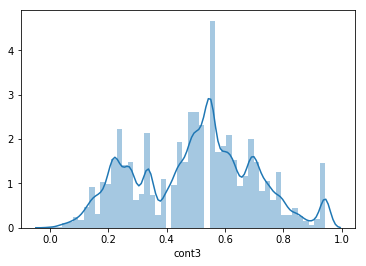

In [42]:
sns.distplot(data['cont3'])

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.0,40)
X = pd.get_dummies(pd.cut(train['cont3'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28716333680578393

In [44]:
data_num['cont3'] = data['cont3'].values

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


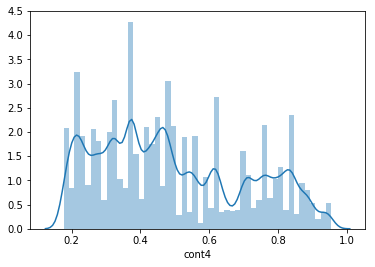

In [45]:
sns.distplot(data['cont4'])

In [46]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont4'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.287276608755243

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont4'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.287276608755243

In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sqrt(train['cont4'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.287276608755243

In [82]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont4'].values+0.2)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.287276608755243

In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(0.1,1.0,30)
X = pd.get_dummies(pd.cut(train['cont4'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.287630476375868

In [63]:
data_num['cont4'] = data['cont4'].values

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


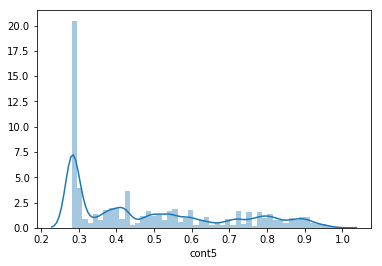

In [54]:
sns.distplot(data['cont5'])

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont5'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2875938986117701

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont5'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2875938986117701

In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.sqrt(train['cont5'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2875938986117701

In [83]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont5'].values+0.2)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2875938986117701

In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(0.2,1.5,40)
X = pd.get_dummies(pd.cut(train['cont5'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2878528410681162

In [64]:
data_num['cont5'] = data['cont5'].values

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


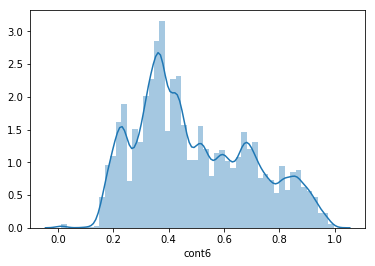

In [66]:
sns.distplot(train['cont6'])

In [65]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont6'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2871125607465133

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont6'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2871125607465133

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cbrt(train['cont6'].values+0.1)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2871125607465133

In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont6'].values+0.2)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2871125607465133

In [75]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.2,40)
X = pd.get_dummies(pd.cut(train['cont6'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28765603154182673

In [76]:
data_num['cont6'] = data['cont6'].values

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


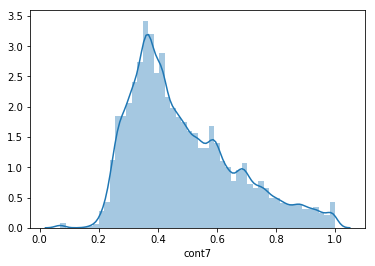

In [78]:
sns.distplot(train['cont7'])

In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont7'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28680800961903963

In [79]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont7'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28680800961903963

In [86]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cos(train['cont7'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868058562176729

In [88]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont7'].values+1.0)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28680800961903963

In [89]:
data_num['cont7'] = np.cos(data['cont7'].values)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


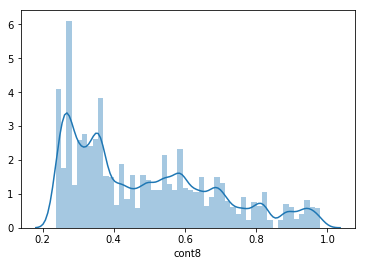

In [90]:
sns.distplot(train['cont8'])

In [91]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont8'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28759875685419434

In [92]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont8'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28759875685419434

In [96]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cbrt(train['cont8'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28759875685419434

In [97]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont8'].values+1.0)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28759875685419434

In [100]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(0.1,1.1,30)
X = pd.get_dummies(pd.cut(train['cont8'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28785355398472534

In [101]:
data_num['cont8'] = data['cont8'].values

In [102]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont9'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28671878899858905

In [103]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont9'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28671878899858905

In [108]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cbrt(train['cont9'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28671878899858905

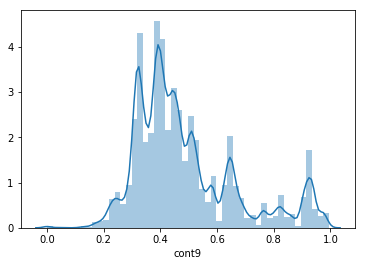

In [111]:
sns.distplot(data['cont9'])

In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.2,30)
X = pd.get_dummies(pd.cut(train['cont9'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2877280585719034

In [109]:
data_num['cont9'] = data['cont9'].values

In [113]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont10'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2869555748659177

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


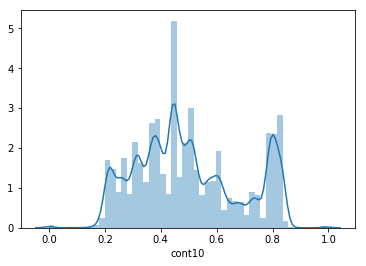

In [114]:
sns.distplot(data['cont10'])

In [115]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont10'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


0.2869636454585107

In [119]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cbrt(train['cont10'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2869555748659177

In [122]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.2,40)
X = pd.get_dummies(pd.cut(train['cont10'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2875885098130304

In [123]:
data_num['cont10'] = data['cont10'].values

In [124]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont11'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868996177734022

In [129]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cbrt(train['cont11'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868996177734022

In [130]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X,_ = boxcox(train['cont11'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868996177734022

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


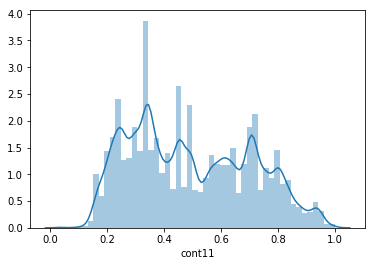

In [131]:
sns.distplot(data['cont11'])

In [133]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.1,30)
X = pd.get_dummies(pd.cut(train['cont11'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28741998395705876

In [134]:
data_num['cont11'] = data['cont11'].values

In [135]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont12'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868136866557177

In [136]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont12'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868136866557177

In [141]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cbrt(train['cont12'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2868136866557177

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


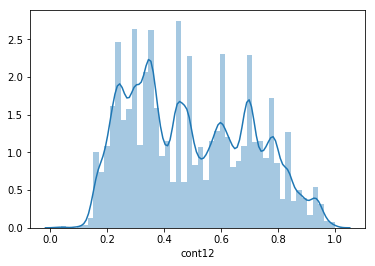

In [142]:
sns.distplot(data['cont12'])

In [143]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.1,30)
X = pd.get_dummies(pd.cut(train['cont12'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28749464639513184

In [144]:
data_num['cont12'] = data['cont12'].values

In [145]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont13'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2873229667571697

In [146]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont13'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2873229667571697

In [155]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = boxcox(train['cont13'].values, lmbda=1.9)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2873229667571697

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


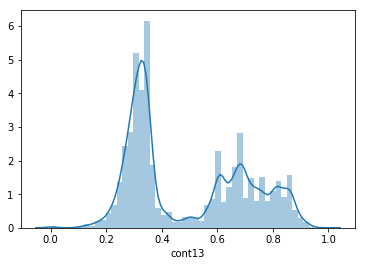

In [156]:
sns.distplot(data['cont13'])

In [157]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = XGBRegressor()
seed = 123
np.random.seed(123)
bins = np.linspace(-0.1,1.1,30)
X = pd.get_dummies(pd.cut(train['cont13'].values, bins))
# print(X.shape)
# X = X.reshape(-1,1)
X = X.values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2877260942611722

In [158]:
data_num['cont13'] = data['cont13'].values

In [159]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = train['cont14'].values
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.2821956048724272

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


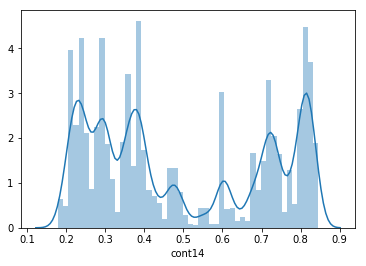

In [161]:
sns.distplot(data['cont14'])

In [160]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.log10(train['cont14'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28219608818532366

In [167]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
model = XGBRegressor()
seed = 123
np.random.seed(123)
X = np.cos(train['cont14'].values)
X = X.reshape(-1,1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
model.fit(X_train, Y_train)
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.28219315204254436

In [168]:
data_num['cont14'] = np.cos(data['cont14'].values)

In [227]:
data_cat.shape, data_num.shape

((313864, 1215), (313864, 13))

In [228]:
data_mat = pd.concat([data_cat, data_num], axis=1).values

In [229]:
data_mat.shape

(313864, 1228)

In [230]:
from scipy.sparse import csr_matrix
data_mat = csr_matrix(data_mat)

In [231]:
data_mat_train = data_mat[:len(train)]
data_mat_test = data_mat[len(train):]

In [183]:
X_train, X_val, Y_train, Y_val = train_test_split(data_mat_train, Y, test_size=0.2, random_state=123)

In [250]:
from lightgbm import LGBMRegressor
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': {'l2', 'l1', 'mae'},
#     'num_leaves': 128,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'early_stopping_round': 20
# }
model = LGBMRegressor(
    boosting_type= 'gbdt',
    objective= 'regression',
    metric= 'mae',
    num_leaves= 128,
    learning_rate= 0.05,
    feature_fraction= 0.9,
    bagging_fraction= 0.8,
    reg_alpha=0.1, 
    reg_lambda=0.1, 
)
model.fit(X_train, Y_train)

LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       learning_rate=0.05, max_depth=-1, metric='mae',
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=128, objective='regression',
       random_state=None, reg_alpha=0.1, reg_lambda=0.1, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [251]:
preds = model.predict(X_val)
mean_absolute_error(Y_val, preds)

0.1839166929848924

In [252]:
preds_test = model.predict(X_test)

In [201]:
submit = pd.read_csv('../datasets/allstate/sample_submission.csv')

In [202]:
submit.head()

,id,loss
0,4,0
1,6,0
2,9,0
3,12,0
4,15,0


In [253]:
submit['loss'] = np.power(10, preds_test)

In [254]:
submit.to_csv('../cache/sub1.csv', index=False)

In [255]:
!kaggle competitions submit -c allstate-claims-severity -f ../cache/sub1.csv -m ""

100%|██████████████████████████████████████| 3.03M/3.03M [01:04<00:00, 49.3kB/s]
Successfully submitted to Allstate Claims Severity

In [256]:
!kaggle competitions submissions -c allstate-claims-severity

fileName                date                 description             status    publicScore  privateScore  
----------------------  -------------------  ----------------------  --------  -----------  ------------  
sub1.csv                2019-02-14 18:32:35  None                    complete  1153.95083   1166.49368    
sub1.csv                2019-02-14 18:12:40  None                    complete  1154.75459   1165.58323    
sub1.csv                2019-02-14 18:10:36  None                    complete  3016.37697   3028.37594    
Sub_wt_m8_m6_k_en1.csv  2016-12-12 03:20:45  None                    complete  1101.84078   1113.83053    
Sub_k_s1_en.csv         2016-12-12 03:14:54  None                    complete  1715.52011   1727.03891    
Sub_m8_m6_k_s_en.csv    2016-12-11 20:04:10  None                    complete  1292.12043   1308.40822    
Sub_m8_m6_k1_en.csv     2016-12-11 17:54:09  None                    complete  1101.67939   1114.17944    
Sub_wt_m8_m6_k_en.csv   2016-12-11 10

In [232]:
# data_cat = pd.DataFrame()

In [233]:
data_cat.shape

(313864, 1215)

In [235]:
cat_cols2 = []
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(len(cat_cols))):
    for j in range(i+1, len(cat_cols)):
        col1 = cat_cols[i]
        col2 = cat_cols[j]
        col = col1 + '_' + col2
        data[col] = data[col1].astype('str') + '_' + data[col2].astype('str')
        cat_cols2.append(col)
        df = pd.get_dummies(data[col])
#         print(df.shape)
        cols = [col+'_'+str(n) for n in range(data[col].nunique())]
        df.columns = cols
        df = df.reset_index(drop=True)
        data_cat = pd.concat([data_cat, df], axis=1)
data_cat = data_cat.reset_index(drop=True)

KeyboardInterrupt: 

In [275]:
#random seeds for stochastic parts of neural network 
np.random.seed(10)
from tensorflow import set_random_seed
set_random_seed(15)

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout, Activation
from keras.layers.embeddings import Embedding


In [269]:
models = []
for categorical_var in tqdm_notebook(cat_cols) :
    model = Sequential()
    no_of_unique_cat  = train[categorical_var].nunique()
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    vocab  = no_of_unique_cat+1
    model.add( Embedding(vocab ,embedding_size, input_length = 1 ))
    model.add(Reshape(target_shape=(embedding_size,)))
    models.append( model )

In [270]:
data_num.shape

(313864, 13)

In [337]:
from keras.layers import Dense, Dropout, Embedding, Flatten, Input, merge, concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU, ReLU
from time import time
import datetime
from keras.models import Model
from keras.optimizers import Adam

def create_model():
    inputs = []
    flatten_layers = []
    for e, c in enumerate(cat_cols):
        input_c = Input(shape=(1, ), dtype='int32')
        no_of_unique_cat  = train[categorical_var].nunique()
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
        sz_c = int(embedding_size)
        num_c  = no_of_unique_cat+1
        
        embed_c = Embedding(
            num_c,
            sz_c,
            input_length=1
        )(input_c)
        embed_c = Dropout(0.1)(embed_c)
        flatten_c = Flatten()(embed_c)

        inputs.append(input_c)
        flatten_layers.append(flatten_c)

    input_num = Input(shape=(X_num_train.shape[1],), dtype='float32')
    flatten_layers.append(input_num)
    inputs.append(input_num)

    # flatten = merge(flatten_layers, mode='concat')
    flatten = concatenate(flatten_layers)
    fc1 = Dense(512, init='he_normal')(flatten)
    fc1 = ReLU()(fc1)
    fc1 = BatchNormalization()(fc1)
#     fc1 = Dropout(0.75)(fc1)
    fc1 = Dropout(0.1)(fc1)

    fc1 = Dense(64, init='he_normal')(fc1)
    fc1 = ReLU()(fc1)
    fc1 = BatchNormalization()(fc1)
#     fc1 = Dropout(0.5)(fc1)
    fc1 = Dropout(0.1)(fc1)
    
    fc1 = Dense(64, init='he_normal')(fc1)
    fc1 = ReLU()(fc1)
    fc1 = BatchNormalization()(fc1)
#     fc1 = Dropout(0.5)(fc1)
    fc1 = Dropout(0.1)(fc1)
    
    
    fc1 = Dense(64, init='he_normal')(fc1)
    fc1 = ReLU()(fc1)
    fc1 = BatchNormalization()(fc1)
#     fc1 = Dropout(0.5)(fc1)
    fc1 = Dropout(0.1)(fc1)

    outputs = Dense(1, init='he_normal', activation='linear')(fc1)

    model = Model(input = inputs, output = outputs)
    adam = Adam(lr=0.005, decay=1e-6, amsgrad=False)
    model.compile(loss='mae', optimizer=adam, metrics=['mae'])
    return model

In [317]:
data2 = pd.DataFrame()

In [318]:
from sklearn.preprocessing import LabelEncoder
cols = data.columns
max_col = {}
for i, col in enumerate(cat_cols):
    if col in num_cols:
        continue
    print(i, col)
    le = LabelEncoder()
    data2[col] = le.fit_transform(data[col])
    max_col[col] = np.max(data2[col])

0 cat1
1 cat2
2 cat3
3 cat4
4 cat5
5 cat6
6 cat7
7 cat8
8 cat9
9 cat10
10 cat11
11 cat12
12 cat13
13 cat14
14 cat15
15 cat16
16 cat17
17 cat18
18 cat19
19 cat20
20 cat21
21 cat22
22 cat23
23 cat24
24 cat25
25 cat26
26 cat27
27 cat28
28 cat29
29 cat30
30 cat31
31 cat32
32 cat33
33 cat34
34 cat35
35 cat36
36 cat37
37 cat38
38 cat39
39 cat40
40 cat41
41 cat42
42 cat43
43 cat44
44 cat45
45 cat46
46 cat47
47 cat48
48 cat49
49 cat50
50 cat51
51 cat52
52 cat53
53 cat54
54 cat55
55 cat56
56 cat57
57 cat58
58 cat59
59 cat60
60 cat61
61 cat62
62 cat63
63 cat64
64 cat65
65 cat66
66 cat67
67 cat68
68 cat69
69 cat70
70 cat71
71 cat72
72 cat73
73 cat74
74 cat75
75 cat76
76 cat77
77 cat78
78 cat79
79 cat80
80 cat81
81 cat82
82 cat83
83 cat84
84 cat85
85 cat86
86 cat87
87 cat88
88 cat89
89 cat90
90 cat91
91 cat92
92 cat93
93 cat94
94 cat95
95 cat96
96 cat97
97 cat98
98 cat99
99 cat100
100 cat101
101 cat102
102 cat103
103 cat104
104 cat105
105 cat106
106 cat107
107 cat108
108 cat109
109 cat110
110 cat1

In [319]:
data_cat2 = data2[cat_cols]
data_num2 = data[num_cols]

In [343]:
data_cat_train = data_cat2[:len(train)].values
data_cat_test = data_cat2[len(train):].values

data_num_train = data_num2[:len(train)].values
data_num_test = data_num2[len(train):].values

In [321]:
data_cat.shape

(313864, 1987)

In [322]:
X_cat_train, X_cat_val, X_num_train, X_num_val, Y_train, Y_val = train_test_split(data_cat_train, 
                                                                                  data_num_train, Y, test_size=0.2,
                                                                                 random_state=123)

In [323]:
xtr = X_num_train
ytr = Y_train
xte = X_num_val
yte = Y_val

xtr_cat = X_cat_train
xte_cat = X_cat_val

# get xtr xte cat
xtr_cat_list, xte_cat_list = [], []
for i in range(xtr_cat.shape[1]):
    xtr_cat_list.append(xtr_cat[:, i].reshape(-1, 1))
    xte_cat_list.append(xte_cat[:, i].reshape(-1, 1))

xtr_cat_list.append(xtr)
xte_cat_list.append(xte)


In [338]:
model = create_model()

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="he_normal")`
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="he_normal")`
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="he_normal")`
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="he_normal")`
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="he_normal")`
/home/watts/anaconda3/envs/itv/lib/python3.6

In [339]:

epochs=3
batch_size=512
model.fit(xtr_cat_list, ytr, epochs=epochs, batch_size=batch_size, verbose=1, 
          validation_data=[xte_cat_list, yte])

Train on 150654 samples, validate on 37664 samples
Epoch 1/3
150654/150654 [==============================] - 54s 357us/step - loss: 0.5862 - mean_absolute_error: 0.5862 - val_loss: 0.3195 - val_mean_absolute_error: 0.3195
Epoch 2/3
150654/150654 [==============================] - 34s 224us/step - loss: 0.2465 - mean_absolute_error: 0.2465 - val_loss: 0.2202 - val_mean_absolute_error: 0.2202
Epoch 3/3
150654/150654 [==============================] - 33s 218us/step - loss: 0.2281 - mean_absolute_error: 0.2281 - val_loss: 0.2393 - val_mean_absolute_error: 0.2393


In [340]:
data_cat_test.shape, data_num_test.shape

((188318, 116), (188318, 14))

In [344]:
X_cat_test = data_cat_test
X_num_test = data_num_test
xte = X_num_test
xte_cat = X_cat_test

# get xte cat
xte_cat_list2 = []
for ii in range(xte_cat.shape[1]):
    xte_cat_list2.append(xte_cat[:, ii].reshape(-1, 1))
xte_cat_list2.append(xte)
    
pred = model.predict(x=xte_cat_list2, batch_size=batch_size, verbose=1)[:, 0]

125546/125546 [==============================] - 7s 55us/step


In [345]:
submit.shape

(125546, 2)

In [346]:
pred

array([2.9073465, 2.9839163, 4.227811 , ..., 3.3062973, 2.8340483,
       3.513668 ], dtype=float32)

In [347]:
submit['loss'] = np.power(10, pred)
submit.to_csv('../cache/sub2.csv', index=False)

In [348]:
!kaggle competitions submit -c allstate-claims-severity -f ../cache/sub2.csv -m ""

100%|██████████████████████████████████████| 1.96M/1.96M [00:39<00:00, 47.0kB/s]
Successfully submitted to Allstate Claims Severity

In [349]:
!kaggle competitions submissions -c allstate-claims-severity

fileName                date                 description             status    publicScore  privateScore  
----------------------  -------------------  ----------------------  --------  -----------  ------------  
sub2.csv                2019-02-14 19:37:55  None                    complete  1386.95121   1407.35779    
sub1.csv                2019-02-14 18:32:35  None                    complete  1153.95083   1166.49368    
sub1.csv                2019-02-14 18:12:40  None                    complete  1154.75459   1165.58323    
sub1.csv                2019-02-14 18:10:36  None                    complete  3016.37697   3028.37594    
Sub_wt_m8_m6_k_en1.csv  2016-12-12 03:20:45  None                    complete  1101.84078   1113.83053    
Sub_k_s1_en.csv         2016-12-12 03:14:54  None                    complete  1715.52011   1727.03891    
Sub_m8_m6_k_s_en.csv    2016-12-11 20:04:10  None                    complete  1292.12043   1308.40822    
Sub_m8_m6_k1_en.csv     2016-12-11 17